In [2]:
import subprocess
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [ ]:
initial_conc = range(700,800,25)
serca_f = range(3.5,7,0.5)
fnames=[]

In [3]:
vol_er = (3.9*0.1*0.1)
vol_cyt = (4.0*0.5*0.5-vol_er)
vol_tot = vol_cyt + vol_er
N_avo=6.0221409e23

In [420]:
def write_mdl(file_name,iterations,ic,sf,serca_frac,write=True):
    ftext = """sprintf(my_seed,"%05g",SEED)

    iterations = e3

    INCLUDE_FILE = "../outputLoc.mdl"
    INCLUDE_FILE = "../initialization.mdl"
    INCLUDE_FILE = "parameters.mdl"
    /* Modifications in Parameters */
        VDCC_number_presynaptic = 40

        n_Glu_neuron =  1 //2000
        GluT_density_astrocyte = 0.1 //1000

        ca_conc_presynaptic_er=e-6     //initial ER conc specified here!!!!!
        //ryr_number_presynaptic = 0 //no RYR

    f=                                 //SERCA parameter adjustments here!!!!!!!!!!

    sm=3 //multiply all serca parameters

    /*Initial SERCA fractions*/
    serca_x1_feq = 
    serca_x1a_feq = 
    serca_x2_feq = 
    serca_y1_feq = 
    serca_y1a_feq = 
    serca_y2_feq = 

    INCLUDE_FILE = "rxn_rate_constants.mdl"
    /* Modifications in Reaction Rate Constants */
    //k_PMCA_0_1 = 0
    //k_PMCA_0_leak = 0


    /* Output Folder */
            //isi = "40"
        sprintf(VDCC, "%g", VDCC_number_presynaptic)
        sprintf(f_mult, "%g", f)   	
        sprintf(init_er_conc, "%g", ca_conc_presynaptic_er*1e6)   	
        fname = "brute500"

        output_folder = outputLoc & "ppf/" & fname & "/" & f_mult & "/" & init_er_conc & "/s_" & my_seed

    /* Rates for P/Q-type Voltage Dependent Calcium Channels */
    /* From Bischoffberger et al., 2005, , Biophys. J.*/

        k_VDCC_PQ_C01 = 0
        k_VDCC_PQ_C12 = 0
        k_VDCC_PQ_C23 = 0
        k_VDCC_PQ_C34 = 0
        k_VDCC_PQ_C43 = 0
        k_VDCC_PQ_C32 = 0
        k_VDCC_PQ_C21= 0
        k_VDCC_PQ_C10 = 0
        k_VDCC_PQ_Ca = 0

    INCLUDE_FILE = "triggered_release.inc.mdl"

    INCLUDE_FILE = "rxn_outputRS.mdl"
    //INCLUDE_FILE = "viz_output.mdl"
    """
    ftext=ftext.replace('iterations = ', 'iterations = '+str(iterations))
    ftext=ftext.replace('ca_conc_presynaptic_er=', 'ca_conc_presynaptic_er='+str(ic))
    ftext=ftext.replace('f=','f='+str(sf))
    for i,p in enumerate(['x1','x1a','x2','y2','y1a','y1']):
        old="serca_"+p+"_feq = "
        new="serca_"+p+"_feq = "+str(serca_frac[i])
        ftext=ftext.replace(old,new)

    if write:
        with open(file_name,'w') as wfile:
            wfile.write(ftext)


In [406]:
#write .mdls for 750

serca_frac=[0.5709841 , 0.27425674, 0.06441576, 0.04471076, 0.03791196, 0.00749021]
#[0.54806097, 0.26166602, 0.0640072 , 0.06357798, 0.05187084, 0.01070176]
#[0.54811016, 0.26235308, 0.06314819, 0.01676654, 0.05549666,0.05389491]
#[0.55819313, 0.25282323, 0.06153492, 0.06188062, 0.05473611, 0.01071676]
#[0.57432588, 0.26861028, 0.064531,   0.04851348, 0.03583775, 0.00818161]
#[0.60013828, 0.29580549, 0.03952524, 0.02892372, 0.02823231, 0.00749021]
#[0.58919106, 0.25120996, 0.05980641, 0.05335331, 0.03768149,0.00875778] 
#[0.765947, 0.201601, 0.013385, 0.002551, 0.008863, 0.007653]

fnames=[]
#ic=750
iterations=5000
for ic in [750]:
    for sf in [4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,5.3]:#[3.5,3.75,4,4.25,4.5,4.75]:
        file_name="/home/kabir/Project/tripartiteSynapse/brute750_4/RSnostim_"+str(sf)+"_"+str(ic)+".mdl"
        fnames.append(file_name)
        write_mdl(file_name,iterations,ic,sf,serca_frac,write=True)

In [407]:
#Make run.sh file to run mdls in parallel. Specific for nishant's computer
#

fnames=[fname.replace('Project/','') for fname in fnames]
bashtext="parallel --results tout mcell33 ::: "+' '.join(fnames)
with open('/home/kabir/Project/tripartiteSynapse/brute750_4/run.sh','w') as f:
    f.write(bashtext)
#["parallel","mcell",":::"]+fnames
#p=subprocess.call(["parallel","mcell",":::","/home/kabir/Project/tripartiteSynapse/ryr_750/RSnostim.mdl"])

In [421]:
#write .mdls for 500

serca_frac=[0.62341553, 0.28796958, 0.04206038, 0.019705, 0.02051164, 0.00633787]
#[0.54806097, 0.26166602, 0.0640072 , 0.06357798, 0.05187084, 0.01070176]
#[0.54811016, 0.26235308, 0.06314819, 0.01676654, 0.05549666,0.05389491]
#[0.55819313, 0.25282323, 0.06153492, 0.06188062, 0.05473611, 0.01071676]
#[0.57432588, 0.26861028, 0.064531,   0.04851348, 0.03583775, 0.00818161]
#[0.60013828, 0.29580549, 0.03952524, 0.02892372, 0.02823231, 0.00749021]
#[0.58919106, 0.25120996, 0.05980641, 0.05335331, 0.03768149,0.00875778] 
#[0.765947, 0.201601, 0.013385, 0.002551, 0.008863, 0.007653]

fnames=[]
#ic=750
iterations=5000
for ic in [500]:
    for sf in [2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5]:
        file_name="/home/kabir/Project/tripartiteSynapse/brute500/RSnostim_"+str(sf)+"_"+str(ic)+".mdl"
        fnames.append(file_name)
        write_mdl(file_name,iterations,ic,sf,serca_frac,write=True)
        
fnames=[fname.replace('Project/','') for fname in fnames]
bashtext="parallel --results tout mcell33 ::: "+' '.join(fnames)
with open('/home/kabir/Project/tripartiteSynapse/brute500/run.sh','w') as f:
    f.write(bashtext)

In [364]:
initial_conc = range(350,750,50)
serca_f = range(5,7)

#obtaining SERCA equilibrium data
sdata={}
end_er_cal={}
for sf in serca_f:
    sdata[sf]={}
    end_er_cal[sf]={}
    for ic in initial_conc:
        #print ic,sf
        serca_data_file='/data/kabir/output/ppf/new_eq/brute750_2/'+str(sf)+'/'+str(ic)+'/s_00001/dat/serca_mol.dat'
        er_data_file='/data/kabir/output/ppf/new_eq/brute750_2/'+str(sf)+'/'+str(ic)+'/s_00001/dat/ca.dat'
        sdata[sf][ic]=np.loadtxt(serca_data_file)[-1][1:]/8678.0
        end_er_cal[sf][ic]=np.loadtxt(er_data_file)[-1][3]*1e15/N_avo/vol_er*1e6
        #print np.sum(sdata[sf][ic])

IOError: /data/kabir/output/ppf/new_eq/brute750_2/5/350/s_00001/dat/serca_mol.dat not found.

In [77]:
initial_conc = range(700,800,4)
serca_f = [3.75,4,4.25,4.5,4.75]
fnames=[]

for ic in initial_conc:
    for sf in serca_f:
        fname="/home/kabir/Project/tripartiteSynapse/brute750_2/RSnostim_"+str(sf)+"_"+str(ic)+".mdl"
        fnames.append(fname)
        #write_mdl(fname,ic,sf,[line(sf,*fit[i]) for i in range(0,6)])

In [308]:
fnames


['/home/kabir/Project/tripartiteSynapse/brute750_4/RSnostim_3.5_730.mdl',
 '/home/kabir/Project/tripartiteSynapse/brute750_4/RSnostim_3.75_730.mdl',
 '/home/kabir/Project/tripartiteSynapse/brute750_4/RSnostim_4_730.mdl',
 '/home/kabir/Project/tripartiteSynapse/brute750_4/RSnostim_4.25_730.mdl',
 '/home/kabir/Project/tripartiteSynapse/brute750_4/RSnostim_4.5_730.mdl',
 '/home/kabir/Project/tripartiteSynapse/brute750_4/RSnostim_4.75_730.mdl',
 '/home/kabir/Project/tripartiteSynapse/brute750_4/RSnostim_3.5_750.mdl',
 '/home/kabir/Project/tripartiteSynapse/brute750_4/RSnostim_3.75_750.mdl',
 '/home/kabir/Project/tripartiteSynapse/brute750_4/RSnostim_4_750.mdl',
 '/home/kabir/Project/tripartiteSynapse/brute750_4/RSnostim_4.25_750.mdl',
 '/home/kabir/Project/tripartiteSynapse/brute750_4/RSnostim_4.5_750.mdl',
 '/home/kabir/Project/tripartiteSynapse/brute750_4/RSnostim_4.75_750.mdl',
 '/home/kabir/Project/tripartiteSynapse/brute750_4/RSnostim_3.5_760.mdl',
 '/home/kabir/Project/tripartiteSyna

(500, 2.5)
(500, 2.6)
(500, 2.7)
(500, 2.8)
(500, 2.9)
(500, 3.0)


IOError: /data/kabir/output/ppf/brute750_5/3.0/500/s_00001/dat/ca.dat not found.

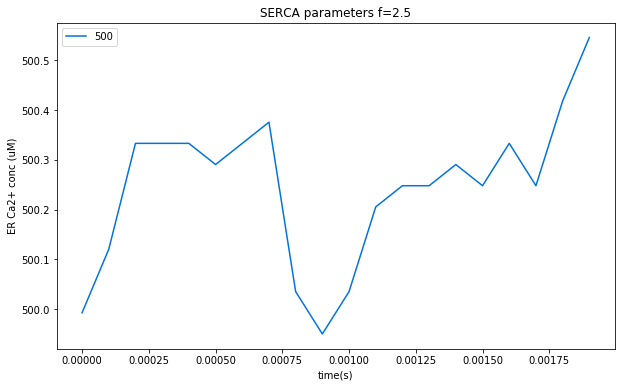

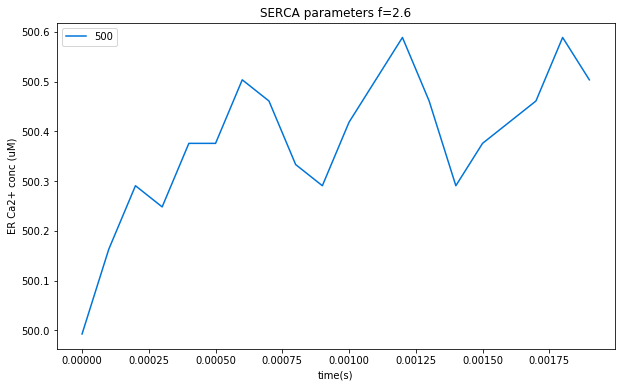

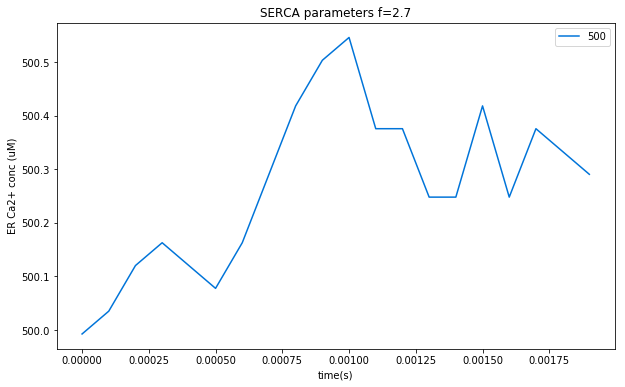

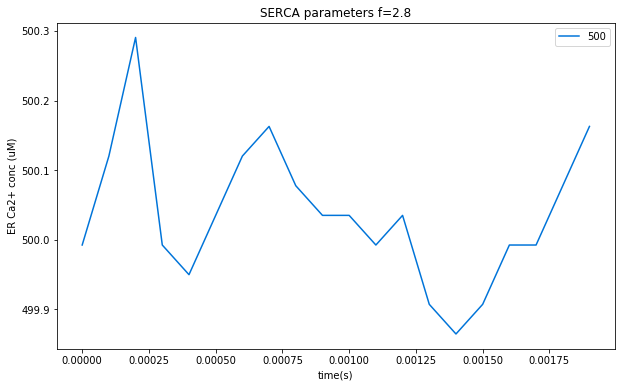

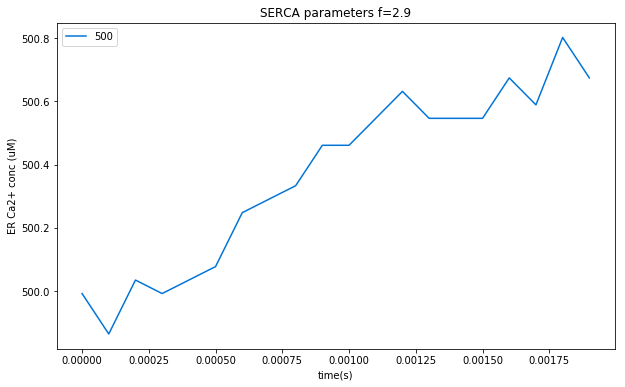

<Figure size 720x432 with 0 Axes>

In [422]:
color=["#0074D9", "#FF851B", "#EE2255", "#001f3f", "#85144b", "#39CCCC", "#FFDC00",
       "#2ECC40", "#7FDBFF", "#B10DC9", "#3D9970", "#AAAAAA", "#000000"]

data={}
sf=5

initial_conc = [500]#range(700,800,25)
serca_f = #[4.5,4.6,4.7,4.8,4.9,5.0]#[3.5,4,4.5,5.0]#,5.5,6,6.5,7]

for sf in serca_f:
    plt.figure(figsize=(10,6))
    for i,ic in enumerate(initial_conc):
        print(ic,sf)
        data_file='/data/kabir/output/ppf/brute750_5/'+str(sf)+'/'+str(ic)+'/s_00001/dat/ca.dat'
        #print data_file
        data[ic]=np.loadtxt(data_file)
        data[ic].T[3]*=1e15/N_avo/vol_er*1e6 #micromolar
        plt.plot(data[ic].T[0],data[ic].T[3],color=color[i],label=str(ic))

    plt.xlabel('time(s)')
    plt.ylabel('ER Ca2+ conc (uM)')

    plt.legend()
    plt.title('SERCA parameters f='+str(sf))

    plt.savefig('/home/kabir/Project/plots/brute4/serca_f'+str(sf)+'.png')

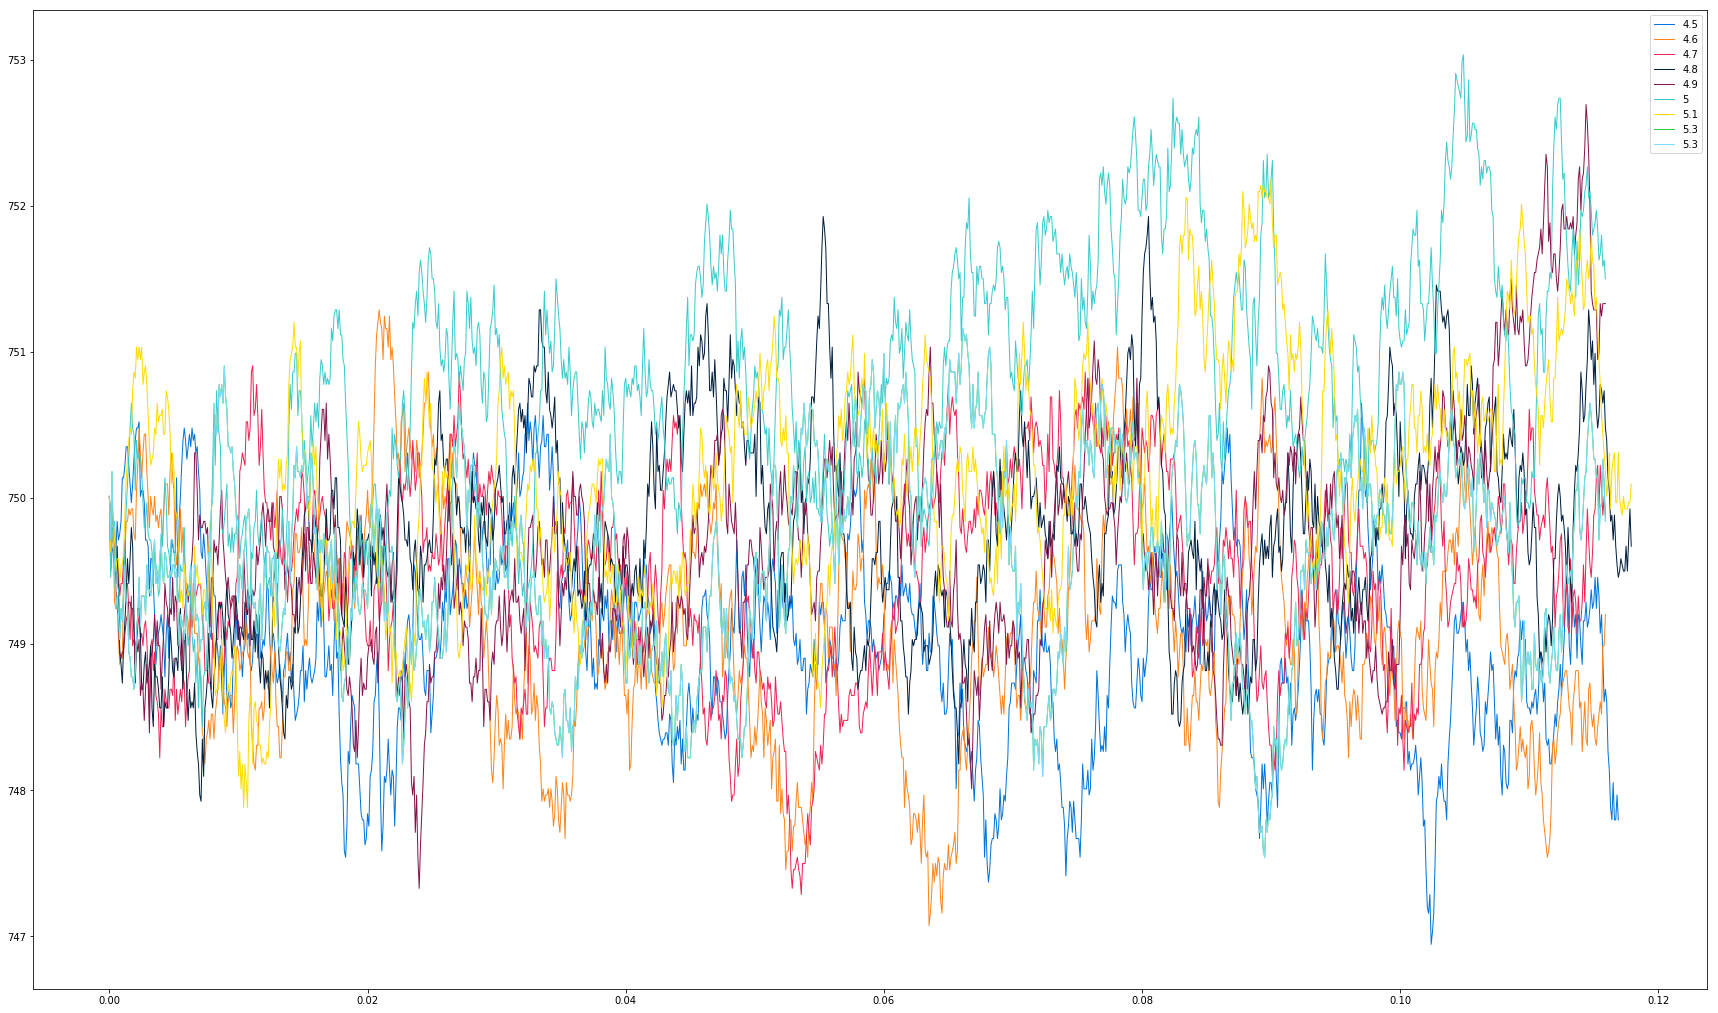

In [457]:
# 750 Ca_ER plots

color=["#0074D9", "#FF851B", "#EE2255", "#001f3f", "#85144b", "#39CCCC", "#FFDC00",
       "#2ECC40", "#7FDBFF", "#B10DC9", "#3D9970", "#AAAAAA", "#000000"]

data={}
ic=750
serca_f=[4.5,4.6,4.7,4.8,4.9,5,5.1,5.3,5.3]#[2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5]
plt.figure(figsize=(30,18))
for i,sf in enumerate(serca_f):
    data_file='/data/kabir/output/ppf/brute750_5/'+str(sf)+'/'+str(ic)+'/s_00001/dat/ca.dat'
    #print data_file
    data[sf]=np.loadtxt(data_file)
    data[sf].T[3]*=1e15/N_avo/vol_er*1e6 #micromolar
    plt.plot(data[sf].T[0],data[sf].T[3],color=color[i],lw=1,label=str(sf), alpha=1)

plt.legend()    
plt.savefig('/home/kabir/Project/plots/brute5/serca_f'+str(ic)+'.png') 


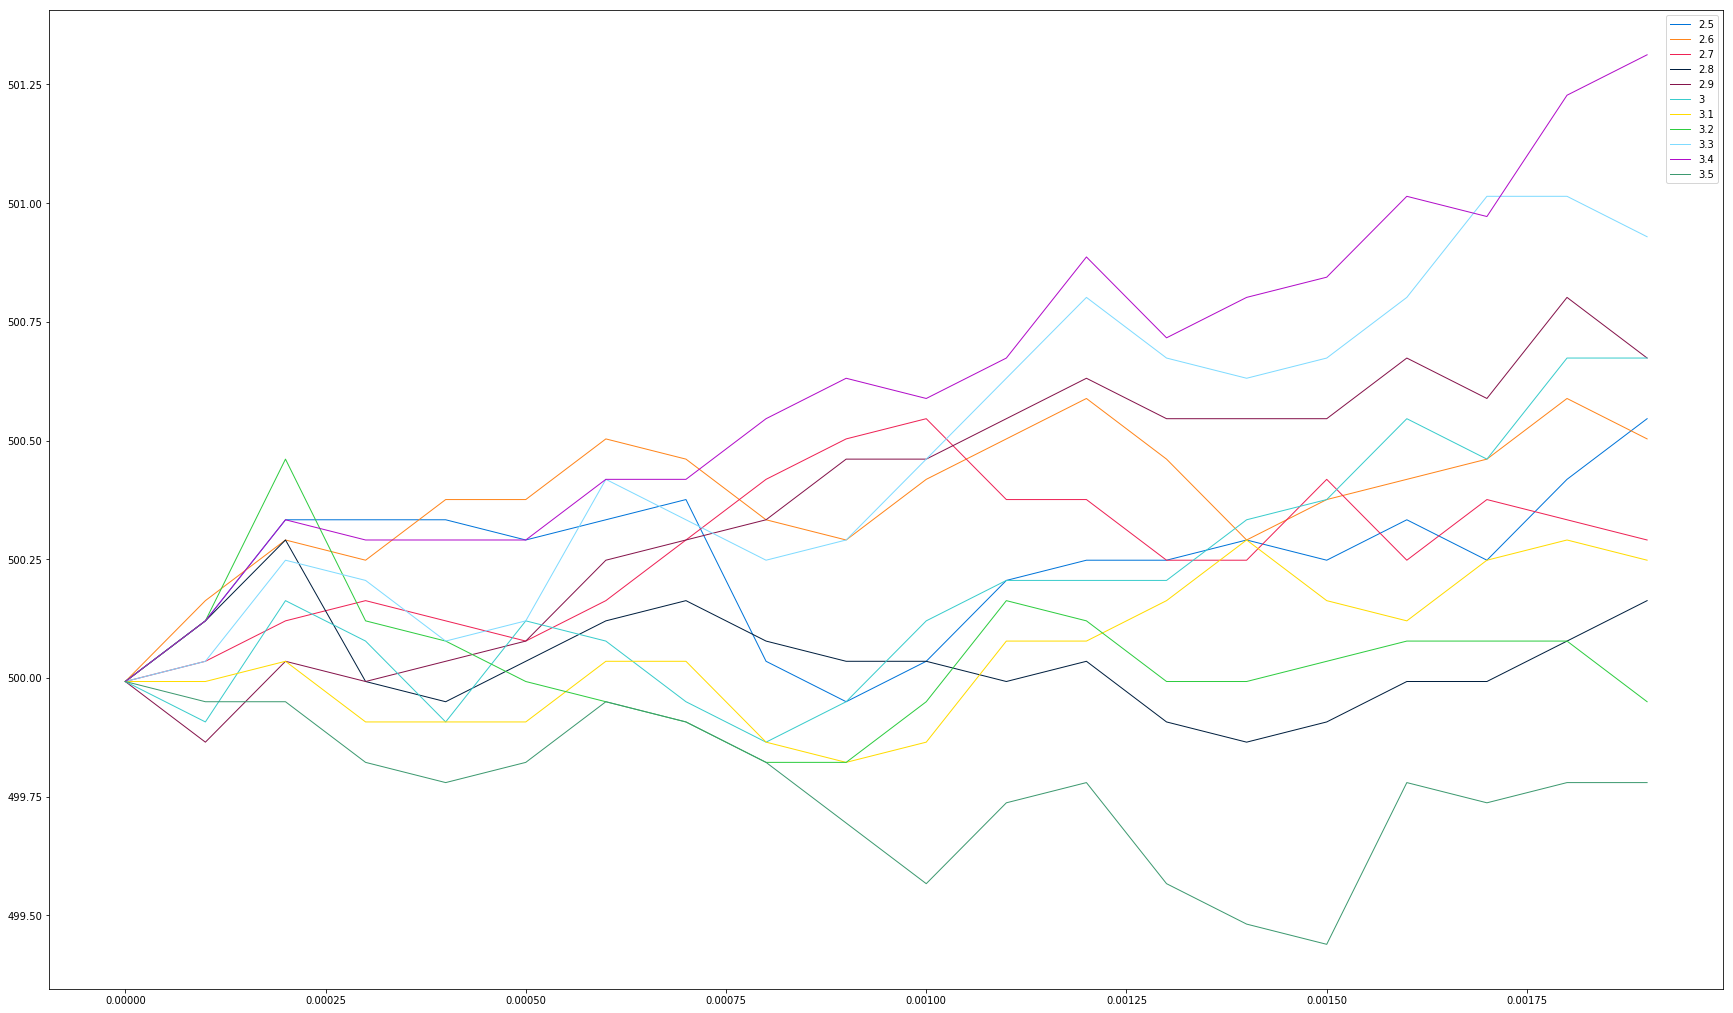

In [458]:
# 500 Ca_ER plots

color=["#0074D9", "#FF851B", "#EE2255", "#001f3f", "#85144b", "#39CCCC", "#FFDC00",
       "#2ECC40", "#7FDBFF", "#B10DC9", "#3D9970", "#AAAAAA", "#000000"]

data={}
ic=500
plt.figure(figsize=(30,18))
serca_f=[2.5,2.6,2.7,2.8,2.9,3,3.1,3.2,3.3,3.4,3.5]
for i,sf in enumerate(serca_f):
    data_file='/data/kabir/output/ppf/brute750_5/'+str(sf)+'/'+str(ic)+'/s_00001/dat/ca.dat'
    #print data_file
    data[sf]=np.loadtxt(data_file)
    data[sf].T[3]*=1e15/N_avo/vol_er*1e6 #micromolar
    plt.plot(data[sf].T[0],data[sf].T[3],color=color[i],lw=1,label=str(sf), alpha=1)

plt.legend()
plt.savefig('/home/kabir/Project/plots/brute5/serca_f'+str(ic)+'.png')    


In [439]:
def calb_pmca_plot(dat_loc):
    pmca_data = np.loadtxt(dat_loc+'pmca&leak_ca_flux.dat')
    calb_data = np.loadtxt(dat_loc+'calbindin_mol.dat')
    
    color=["#0074D9", "#FF851B", "#EE2255", "#001f3f", "#85144b", "#39CCCC", "#FFDC00",
       "#2ECC40", "#7FDBFF", "#B10DC9", "#3D9970", "#AAAAAA", "#000000"]
    
    plt.figure(figsize=(15,6))

    #plot PMCA flux
    plt.plot(pmca_data.T[0],pmca_data.T[2]-pmca_data.T[1],color=color[i],label="PMCA Flux IN(leak)-OUT")

    #plot calcium released by calbindin (initial-final bound calbindin)
    calb_tot_bnd=calb_data.T[2]+calb_data.T[4]+2*(calb_data.T[3]+calb_data.T[5]+calb_data.T[7])+3*(calb_data.T[6]+calb_data.T[8])+4*calb_data.T[9]
    calb_rel=calb_tot_bnd[0]-calb_tot_bnd
    plt.plot(pmca_data.T[0],calb_rel,label="Calbindin released calcium")
    plt.legend()
    #plt.savefig('/home/kabir/Project/plots/calb_pmca.png')

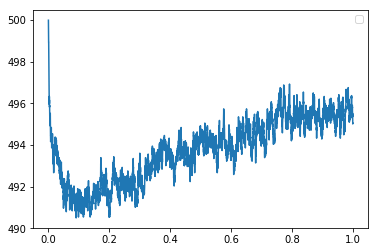

In [417]:
ic=775
sf=7
#for sf in [2.08008,4,5]:
data_file='/data/kabir/output/ppf/brute750/3/500/s_00001/dat/ca.dat'
#print data_file
data[ic]=np.loadtxt(data_file)
data[ic].T[3]*=1e15/N_avo/vol_er*1e6 #micromolar
plt.plot(data[ic].T[0],data[ic].T[3])
plt.legend()
data_file='/data/kabir/output/ppf/RSnostim_750_emptyER_sm/sm3/s_00001/dat/ca.dat'
#print data_file
data[ic]=np.loadtxt(data_file)
data[ic].T[3]*=1e15/N_avo/vol_er*1e6 #micromolar

#plt.plot(data[ic].T[0],data[ic].T[3],label='old')

In [389]:
sf=3
ic=600
#calb_pmca_plot('/data/kabir/output/ppf/brute750/'+str(sf)+'/'+str(ic)+'/s_00001/dat/')
int(2.08)

2

In [105]:
#calb_pmca_plot('/data/kabir/output/ppf/old_stuff/old_RSnostim_250RSnostim_250_noleak/s_00001/dat/')

In [414]:
def serca_mol_plot(dat_loc):
    serca_mol= np.loadtxt(dat_loc+'/serca_mol.dat')
    plt.figure(figsize=(15,6))
    for i,lb in enumerate(['X1','X1a','X2','Y2','Y1a','Y1']):
        plt.plot(serca_mol.T[0],serca_mol.T[i+1]/8678.0,label=lb)
    plt.legend()
    #plt.ylim((0,0.1))
    plt.xlim((0,0.01))
    #return np.average(np.array(serca_mol[:,1:])/8678.0,axis=0)
    return np.array(serca_mol[-1,1:])/8678.0
    #print serca_mol[0,1:]/8678.0

array([0.62341553, 0.28796958, 0.04206038, 0.019705  , 0.02051164,
       0.00633787])

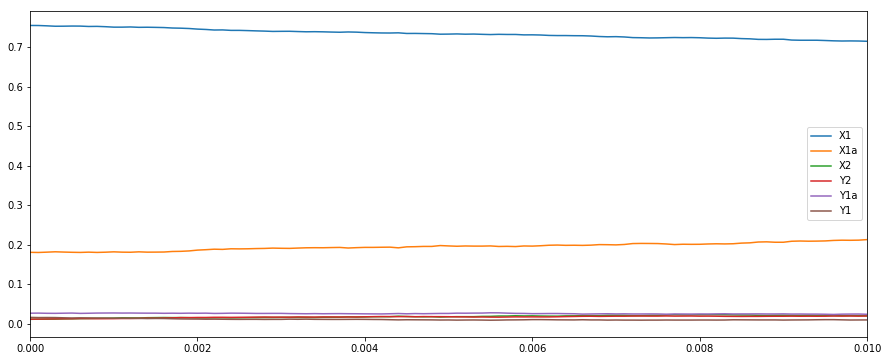

In [415]:
serca_mol_plot('/data/kabir/output/ppf/brute750/3/500/s_00001/dat')


In [292]:
data_file='/data/kabir/output/ppf/brute750/'+str(sf)+'/'+str(ic)+'/s_00001/dat/ca.dat'
data[ic]=np.loadtxt(data_file)
data[ic].T[3]*=1e15/N_avo/vol_er*1e6 #micromolar

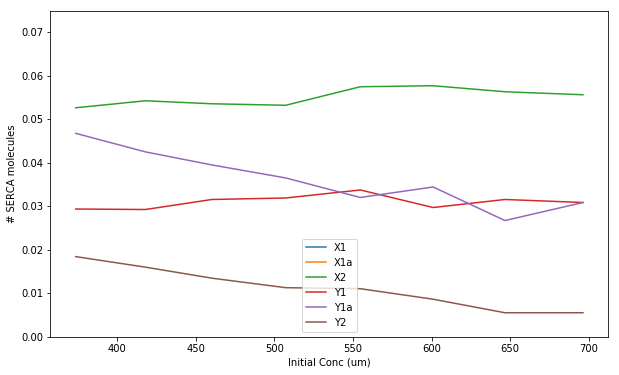

In [306]:
#for sf in serca_f:
sf=4

initial_conc = range(350,750,50)

plt.figure(figsize=(10,6))
for i,lb in enumerate(['X1','X1a','X2','Y1','Y1a','Y2']):
    state_series=[]
    for ic in initial_conc:
        state_series.append(sdata[sf][ic][i]/8678.0)
    plt.plot([end_er_cal[sf][ic] for ic in initial_conc],state_series,label=lb)
plt.ylim((0,0.075))
plt.xlabel('Initial Conc (um)')
plt.ylabel('# SERCA molecules')
plt.legend()

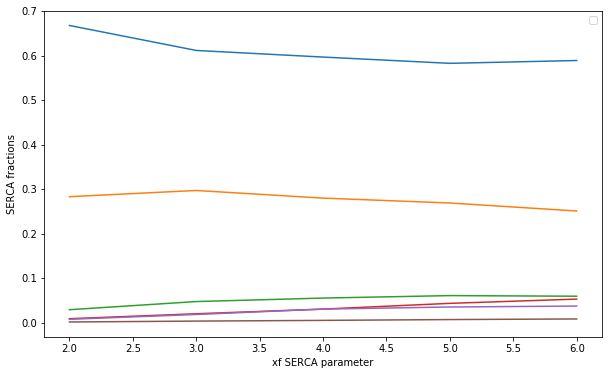

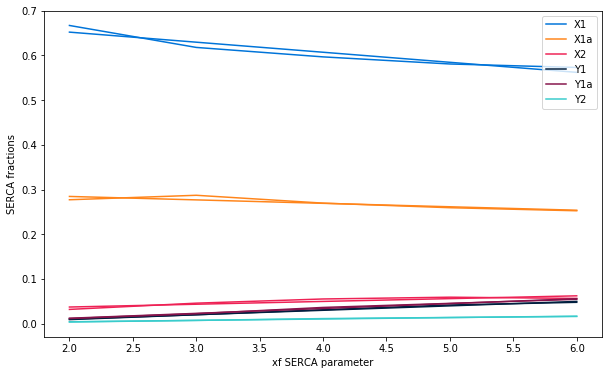

In [35]:
initial_conc=range(350,750,50)
serca_f=range(2,7)

color=["#0074D9", "#FF851B", "#EE2255", "#001f3f", "#85144b", "#39CCCC", "#FFDC00",
       "#2ECC40", "#7FDBFF", "#B10DC9", "#3D9970", "#AAAAAA", "#000000"]

plt.figure(figsize=(10,6))
for i,lb in enumerate(['X1','X1a','X2','Y1','Y1a','Y2']):
    plt.plot(serca_f,[sdata[sf][700][i] for sf in serca_f])
#plt.ylim((0,0.075))
plt.xlabel('xf SERCA parameter')
plt.ylabel('SERCA fractions')
plt.legend()

plt.figure(figsize=(10,6))
fit=[]
for i,lb in enumerate(['X1','X1a','X2','Y1','Y1a','Y2']):
    ydata=[np.average([sdata[sf][ic][i] for ic in initial_conc]) for sf in serca_f]
    xdata=serca_f
    plt.plot(xdata,ydata, color=color[i],label=lb)
    popt,pcov=curve_fit(line,xdata,ydata)
    fit.append(popt)
    xdata = np.linspace(2, 6, 50)
    plt.plot(xdata, line(xdata, *fit[i]), color=color[i])

#plt.ylim((0,0.075))
plt.xlabel('xf SERCA parameter')
plt.ylabel('SERCA fractions')
plt.legend()

In [34]:
def line(x,A,B):
    return A*x+B

In [119]:
#fit

In [247]:
np.sum([line(3,*fit[i]) for i in range(0,6)])

0.9999999999641

In [239]:
np.sum(sdata[3][350])

8678.0

In [118]:
#sdata

In [39]:
end_er_cal[6][700]

704.1111260376538

(0, 0.1)

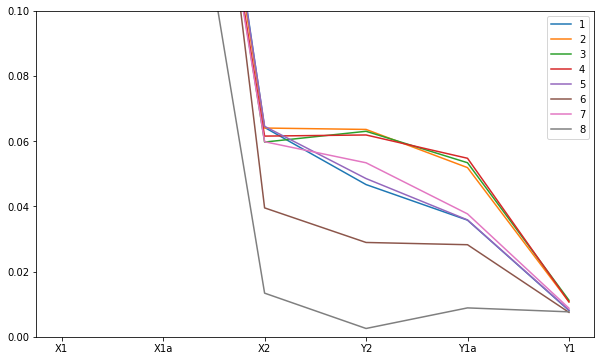

In [398]:
serca_frac=[[0.57158459, 0.27359223, 0.06418658, 0.04667358, 0.03576989, 0.0080779 ],
[0.54806097, 0.26166602, 0.0640072 , 0.06357798, 0.05187084, 0.01070176],
[0.55645286, 0.2561462 , 0.05970528, 0.06300944, 0.05336742, 0.01120356],
[0.55819313, 0.25282323, 0.06153492, 0.06188062, 0.05473611, 0.01071676],
[0.57432588, 0.26861028, 0.064531,   0.04851348, 0.03583775, 0.00818161],
[0.60013828, 0.29580549, 0.03952524, 0.02892372, 0.02823231, 0.00749021],
[0.58919106, 0.25120996, 0.05980641, 0.05335331, 0.03768149,0.00875778],
[0.765947, 0.201601, 0.013385, 0.002551, 0.008863, 0.007653]]
plt.figure(figsize=(10,6))
for i,frac in enumerate(serca_frac):
    #print frac
    plt.plot(['X1','X1a','X2','Y2','Y1a','Y1'],frac,label=str(i+1))
plt.legend()
plt.ylim((0,0.1))

In [288]:
dat_loc='/data/kabir/output/ppf/new_eq/brute750_2/7/775/s_00001/dat'
serca_mol= np.loadtxt(dat_loc+'/serca_mol.dat')
t_interval=serca_mol[1,0]-serca_mol[0,0]
print 1000*t_interval
np.average(np.array(serca_mol[-1000:-1,1:]/8678.0),axis=0)

0.1


array([0.54806097, 0.26166602, 0.0640072 , 0.06357798, 0.05187084,
       0.01070176])

In [304]:
18202*1e15/N_avo/vol_er*1e6 #micromolar

775.0033691804664

In [322]:
sf=3.75
ic=750
np.loadtxt('/data/kabir/output/ppf/brute750_4/'+str(sf)+'/'+str(ic)+'/s_00001/dat/ca.dat')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: UserWarning: loadtxt: Empty input file: "/data/kabir/output/ppf/brute750_4/3.75/750/s_00001/dat/ca.dat"
  This is separate from the ipykernel package so we can avoid doing imports until


array([], dtype=float64)

In [363]:
sdata

{5: {}}